In [589]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Introduction #

Student performance can be closely linked with various demographic and cultural factors. While academic achievement is mostly measure as a result of scores on a multitude of tests, an academic institution would do well to recognize which demographics can be shown to have strong associations with academic achievement. This study aims to provide a framework for how institutions can idenitify groups within the student body and then learn more about the composition of these groups. By looking deeper, institutions can then provided targeted support proactively in order to provide a learning environment which is responsive to students and their backgrounds in order to allow students to learn better and achieve higher.

This dataset involves 11 categorical features giving context to a student's background. Features involving gender, ethnic group, parental education, free/reduced lunch status, parental marital status, first child status, and number of sibilings give an indication of home life and up bringing.  Other features including test prep completion, practice for sports, transportation means, and weekly study hours give insight into the interests and social habits. Combined, these features provide a good snapshot of "who a student is."

Groupings will be done through three quantitative features from a hypothetical standardized test: Mathematics Score, Reading Score, Writing Score. These three provide context to what a student knows or can show. Within these scores, we aim to find groupings which have distinct demographic characteristics.

# Exploratory Data Analysis #

After reading in the data and taking a look, it can be seen that a number of rows have missing data deignated by "NaN." Removing these took away approximately 11,000 data entries, approximately one-third of the dataset. While sizeable, the remaining 19,243 entries is plenty big enough to provide a good amount of data to perform a proper analysis.

Some data cleaning is also necessary to reformat some entries to asssist in analysis. Shortening the Ethnic Group  and Parental Education designation, changing the type of Number of Siblings from numberic to categorical, and replacing the entries for Weekly Study Hours is needed. The Weekly Study Hours change will allow for easier Frequent Pattern analysis later on in the study.

Finally, a look at the most frequent entry in each column gives some indication of the demographics of a "typical" student. This will be helpful when performing a comparison with the "typical" student within each group.

In [622]:
data = pd.read_csv('Expanded_data_with_more_features.csv', index_col=0)
data.columns

Index(['Gender', 'EthnicGroup', 'ParentEduc', 'LunchType', 'TestPrep',
       'ParentMaritalStatus', 'PracticeSport', 'IsFirstChild', 'NrSiblings',
       'TransportMeans', 'WklyStudyHours', 'MathScore', 'ReadingScore',
       'WritingScore'],
      dtype='object')

In [591]:
data.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


In [592]:
data['WklyStudyHours'].unique()

array(['< 5', '5 - 10', '> 10', nan], dtype=object)

In [593]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30641 entries, 0 to 960
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               30641 non-null  object 
 1   EthnicGroup          28801 non-null  object 
 2   ParentEduc           28796 non-null  object 
 3   LunchType            30641 non-null  object 
 4   TestPrep             28811 non-null  object 
 5   ParentMaritalStatus  29451 non-null  object 
 6   PracticeSport        30010 non-null  object 
 7   IsFirstChild         29737 non-null  object 
 8   NrSiblings           29069 non-null  float64
 9   TransportMeans       27507 non-null  object 
 10  WklyStudyHours       29686 non-null  object 
 11  MathScore            30641 non-null  int64  
 12  ReadingScore         30641 non-null  int64  
 13  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(3), object(10)
memory usage: 3.5+ MB


In [594]:
#Remove NAs
data.dropna(axis='index', inplace=True)

In [595]:
#data cleaning
import re

data['EthnicGroup'] = [x.split(' ')[1] for x in data['EthnicGroup']]
data['ParentEduc'] = [x.split(' ')[0] for x in data['ParentEduc']]
data['ParentEduc'] = [x.split("'")[0] for x in data['ParentEduc']]
dic = {"5":"Low", "510": "Mid", "10": "High"}
data['WklyStudyHours'] = [re.sub("\D", "", x) for x in data['WklyStudyHours']]
data = data.replace({"WklyStudyHours":dic})
data['NrSiblings'] = data['NrSiblings'].astype('object')

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19243 entries, 2 to 960
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Gender               19243 non-null  object
 1   EthnicGroup          19243 non-null  object
 2   ParentEduc           19243 non-null  object
 3   LunchType            19243 non-null  object
 4   TestPrep             19243 non-null  object
 5   ParentMaritalStatus  19243 non-null  object
 6   PracticeSport        19243 non-null  object
 7   IsFirstChild         19243 non-null  object
 8   NrSiblings           19243 non-null  object
 9   TransportMeans       19243 non-null  object
 10  WklyStudyHours       19243 non-null  object
 11  MathScore            19243 non-null  int64 
 12  ReadingScore         19243 non-null  int64 
 13  WritingScore         19243 non-null  int64 
dtypes: int64(3), object(11)
memory usage: 2.2+ MB


<>:8: DeprecationWarning:

invalid escape sequence \D

<>:8: DeprecationWarning:

invalid escape sequence \D

/var/folders/d7/l32r0x7x5k54c3g3r56x6ybw0000gp/T/ipykernel_59653/869902640.py:8: DeprecationWarning:

invalid escape sequence \D



In [596]:
data.head()
df2 = data.copy()
df2.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
2,female,B,master,standard,none,single,sometimes,yes,4.0,school_bus,Low,87,93,91
4,male,C,some,standard,none,married,sometimes,yes,0.0,school_bus,Mid,76,78,75
5,female,B,associate,standard,none,married,regularly,yes,1.0,school_bus,Mid,73,84,79
6,female,B,some,standard,completed,widowed,never,no,1.0,private,Mid,85,93,89
7,male,B,some,free/reduced,none,married,sometimes,yes,1.0,private,High,41,43,39


In [597]:
#Describe a typical student
data.describe(include = 'object')

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours
count,19243,19243,19243,19243,19243,19243,19243,19243,19243.0,19243,19243
unique,2,5,5,2,2,4,3,2,8.0,2,3
top,female,C,some,standard,none,married,sometimes,yes,1.0,school_bus,Mid
freq,9775,6181,8083,12472,12587,11009,9715,12417,5407.0,11280,10499


A "typical" student within this data set is female, from ethnic group C, has parents with some education, does not qualify for free/reduced lunch, had no test prep, has married parents, sometimes practices sports, is a first child, has one sibiling, takes the school bus, and generally studies 5-10 hours per week.  None of these demographic characteristics are surprising.  Looking at the counts of each, many make sense, female being about 50% of the Gender responses for example.  

By comparing the group demographics after the modeling, a comparison can give insight into how each group departs from this "typical" student.

# Modeling #

First, the quantitative features are separated out for K-means clustering analysis.  By using a range of clusters and noting the interia, the sum of squared distances from each point to the closest cluster center, an "elbow" method determination can be made. By identifying where the graph of cluster numbers vs. Inertia has an "elbow" or noticeable bend, a decision can be made regarding the optinal number of groups needed to get the smallest practical inertia or where increasing the number of groups stops showing a noticeable drop in intertia.

In [598]:
# split data - student results for clusters
df = data.iloc[:,11:14]
df.head()

,MathScore,ReadingScore,WritingScore
2,87,93,91
4,76,78,75
5,73,84,79
6,85,93,89
7,41,43,39


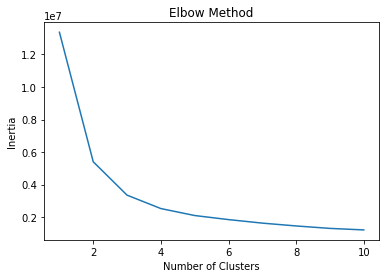

In [599]:
#K-means
from sklearn.cluster import KMeans

inertias = []

for i in range(1,11):
    model=KMeans(n_clusters = i, n_init='auto')
    model.fit_predict(df)
    inertias.append(model.inertia_)
    
plt.plot(range(1,11), inertias)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

The graph aboves summarizes the result of K-means modeling using 1-10 groups.  The graph has steep lines on the left indicating immediate improvement (drop in interia) from 1 to 2 groups, 2-3, and 3-4 follwed by shallowing out which can be seen around 4-6 clusters. This indicates that going above 4-6 clusters does not substantially improve the performance as measured in a lower initeria.  In order to confirm the best number of groups, a dendogram can be made to help make this determination. The dendogram, which provides for a visual account for which data points are most similar, can be helpful.

The dendogram below confirms the inital conclusion that at some point around 4-6 groups is an ideal number to work with. Specifically five groups as seen below.

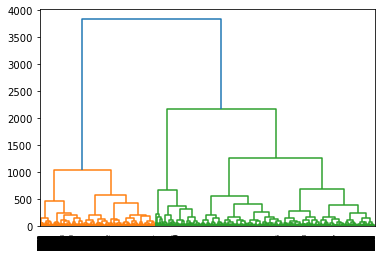

In [600]:
#Heirarchial Clustering
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

links = linkage(df, method='ward', metric='euclidean')
dendrogram(links)
plt.show()


Next, the K-means clustering can produce cluster centers giving up mean scores - mathematics, reading and writing - for each cluster.  There appears to be clusters centered at similar values across the three scores.  Translating them to a standard grading scales, there is one cluster in the high 80s and low 90s, one at the mid-or-upper 70s, one in the mid-to-upper 60s, one in the mid-to-upper 50s, and one in the low 40s. Given scores on standardized tests and how they can be distributed, none of this is suprising. Without further understanding of the nature of the test itself, it is limited in how much can be pulled from these 5 group centers. Suffice it say though that they will all for some good comparisons going forward.

In [601]:
#Cluster Centers - locations of "central, average, or typical" student in each cluster by academic performance
model=KMeans(n_clusters = 5, n_init='auto')
model.fit_predict(df)
model.cluster_centers_

array([[41.15841073, 43.74716202, 41.86171311],
       [65.97589041, 69.00474886, 68.07726027],
       [88.00544267, 91.31785196, 91.56458636],
       [55.33633766, 57.87843482, 56.33238074],
       [76.68861878, 79.66961326, 79.04220994]])

The final step in the modeling process will be to predict cluster membership of each "student" based on proximity to one of these clusters.  

In [602]:
labels = model.labels_

In [603]:
data['Label'] = labels
data.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore,Label
2,female,B,master,standard,none,single,sometimes,yes,4.0,school_bus,Low,87,93,91,2
4,male,C,some,standard,none,married,sometimes,yes,0.0,school_bus,Mid,76,78,75,4
5,female,B,associate,standard,none,married,regularly,yes,1.0,school_bus,Mid,73,84,79,4
6,female,B,some,standard,completed,widowed,never,no,1.0,private,Mid,85,93,89,2
7,male,B,some,free/reduced,none,married,sometimes,yes,1.0,private,High,41,43,39,0


In [604]:
#Label distribution
data['Label'].value_counts()/sum(data['Label'].value_counts())

1    0.285870
3    0.235254
4    0.234371
2    0.144000
0    0.100504
Name: Label, dtype: float64

The relative frequencies of the five groups are listed above.  It is intersting to note that they are not evenly distributed and it is unknown which group corresponds to the centers found above.  Some visualizations can be helpful in finding those centers.

# Cluster Visualizations #

Two types of visualizations were created.  One showing the two dimensional relationship between the three academic result features - Mathematics Score, Reading Score, Writing Score.  Seen below, the colors show the group membership of each student in the dataset. While it is interesting (and expected) that the plots involving mathematics scores showed increased spead and variability (determined by visual inspection), the correspondance between the groups and the label is still unknown as the colors are not specifically mapped to a label designation. 

A 3-D scatter plot was also created with the hope of inspecting the three-dimensional nature of the data but it also solved the problem of relating labels to colors. This plot came with a color legend corresponding to each group (see below). From this legend, label 3 was the highest achieving, followed by labels 0, 4, 2, and lastly 1.  Taking this knowledge and looking at the relative frequencies again, the two smallest groups (0.14 and 0.10) correspond to the highest and lowest achieving students respectively.  The full correspondance in summarized below.

| Group | Frquency |
|-------|----------|
|  3   |  0.144  |
|  0   |  0.234  |
|  4   |  0.286  |
|  2   |  0.235  |
|  1   |  0.101  |

There is a noticeable symmetry to the numbers which would indicate a possible underlying symmetric distribution of test scores, possibly bell shaped.  More exploration and analysis could be done to prove this further but it falls outside of the scope of this analysis even though it is interesting.

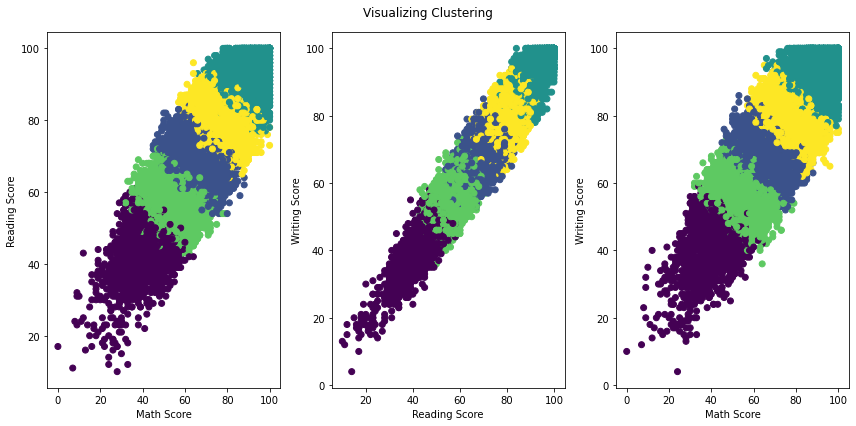

In [605]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(12,6))
fig.suptitle('Visualizing Clustering')

ax1.scatter(df.iloc[:,0], df.iloc[:,1], c=labels)
ax1.set_xlabel('Math Score')
ax1.set_ylabel('Reading Score')

ax2.scatter(df.iloc[:,1], df.iloc[:,2], c=labels)
ax2.set_xlabel('Reading Score')
ax2.set_ylabel('Writing Score')

ax3.scatter(df.iloc[:,0], df.iloc[:,2], c=labels)
ax3.set_xlabel('Math Score')
ax3.set_ylabel('Writing Score')

fig.tight_layout()

plt.show()

In [606]:
import plotly.express as px

fig = px.scatter_3d(df, x='MathScore', y='ReadingScore', z='WritingScore', color=labels)
fig.show()

# Group Evaluation and Comparison #

To grain a better understanding of each group, a frequent pattern analysis was performed. Using the FP-Growth algorithm, frequent itemsets within this group can be idenitified. This allowes for a listing of the most frequent demographic characteristcs within each group.  The FP-Growth algorithm works under the premise that frequency combinations of items must contain items which are frequent on their own. By finding frequently occuring demographic characteristics or combinations of characteristcs, hopefully a picture of a "typical" student within each group can be found. The support value represents the percent of group members which have that characteristic. For this analysis, the support was set to 50%, representing those characteristics which appear in more than 50% of group members

In [609]:
data.drop(['MathScore', 'ReadingScore', 'WritingScore'], axis=1, inplace=True)
for col in data.columns:
    print(col, data[col].unique())

Gender ['female' 'male']
EthnicGroup ['B' 'C' 'D' 'A' 'E']
ParentEduc ['master' 'some' 'associate' 'high' 'bachelor']
LunchType ['standard' 'free/reduced']
TestPrep ['none' 'completed']
ParentMaritalStatus ['single' 'married' 'widowed' 'divorced']
PracticeSport ['sometimes' 'regularly' 'never']
IsFirstChild ['yes' 'no']
NrSiblings [4.0 0.0 1.0 3.0 2.0 5.0 7.0 6.0]
TransportMeans ['school_bus' 'private']
WklyStudyHours ['Low' 'Mid' 'High']
Label [2 4 0 1 3]


In [617]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import fpgrowth, association_rules

i = 2
df3 = data[data['Label']==i]
df3.drop(['Label'], axis=1, inplace=True)
df_pat = df3.values.astype('str').tolist()
    
tr = TransactionEncoder()
tr_arr = tr.fit(df_pat).transform(df_pat)
df = pd.DataFrame(tr_arr, columns=tr.columns_)

frequent_itemsets = fpgrowth(df, min_support=0.5, use_colnames=True)
print('Group:', i)
print(frequent_itemsets)
print('\n')

Group: 2
    support                itemsets
0  0.870805              (standard)
1  0.654998                   (yes)
2  0.630819                (female)
3  0.573078            (school_bus)
4  0.566222                   (Mid)
5  0.535186             (completed)
6  0.565500               (married)
7  0.566222         (standard, yes)
8  0.541682      (standard, female)
9  0.501985  (standard, school_bus)




/Users/bmckiernan/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Most interesting from group 1 are the three pairings of demographics which appear in over 50% of the group 1 members.  Since group 1 represents those strongest students based on results, those with standard lunch and a first child, standard lunch and female, standard lunch and take the school bus are those demographics most strongly associated, empirically, with high academic performance.

In [618]:
i = 4
df3 = data[data['Label']==i]
df3.drop(['Label'], axis=1, inplace=True)
df_pat = df3.values.astype('str').tolist()
    
tr = TransactionEncoder()
tr_arr = tr.fit(df_pat).transform(df_pat)
df = pd.DataFrame(tr_arr, columns=tr.columns_)

frequent_itemsets = fpgrowth(df, min_support=0.5, use_colnames=True)
print('Group:', i)
print(frequent_itemsets)
print('\n')

Group: 4
    support      itemsets
0  0.760310    (standard)
1  0.645011         (yes)
2  0.588470  (school_bus)
3  0.586918        (none)
4  0.576718     (married)
5  0.548337         (Mid)
6  0.510643   (sometimes)
7  0.537916      (female)




/Users/bmckiernan/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



The lack of paired frequent results is noticeable and important as it indicates that the group is more demographically heterogeneous. Also apparent are the same single characteristics as group 1 except for the "none" reponse for the Test Prep category.  This gives an indication that taking a test preparation course could be a distinguishing factor between the highest and second highest group.

In [619]:
i = 0
df3 = data[data['Label']==i]
df3.drop(['Label'], axis=1, inplace=True)
df_pat = df3.values.astype('str').tolist()
    
tr = TransactionEncoder()
tr_arr = tr.fit(df_pat).transform(df_pat)
df = pd.DataFrame(tr_arr, columns=tr.columns_)

frequent_itemsets = fpgrowth(df, min_support=0.5, use_colnames=True)
print('Group:', i)
print(frequent_itemsets)
print('\n')

Group: 0
     support              itemsets
0   0.815408                (none)
1   0.652534                 (yes)
2   0.633919        (free/reduced)
3   0.607549                (male)
4   0.577559             (married)
5   0.508273           (sometimes)
6   0.505688                (some)
7   0.561531          (school_bus)
8   0.532575                 (Mid)
9   0.534126           (yes, none)
10  0.507239  (free/reduced, none)




/Users/bmckiernan/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



This group represents the middle performing students. Immediately it should be noted that the combination of free/reduced lunch-no test preparation and first child status-no test preparation are prevalent in this group. Many of the same categories are present in this group as in the other two already examined with the noticeable difference in male and free/reduced lunch. This marks a noticeable demographic departure and could be an indication of populations in need of targeted intervention.

In [620]:
i = 1
df3 = data[data['Label']==i]
df3.drop(['Label'], axis=1, inplace=True)
df_pat = df3.values.astype('str').tolist()
    
tr = TransactionEncoder()
tr_arr = tr.fit(df_pat).transform(df_pat)
df = pd.DataFrame(tr_arr, columns=tr.columns_)

frequent_itemsets = fpgrowth(df, min_support=0.5, use_colnames=True)
print('Group:', i)
print(frequent_itemsets)
print('\n')

Group: 1
    support      itemsets
0  0.505181   (sometimes)
1  0.672969        (none)
2  0.645701    (standard)
3  0.643338         (yes)
4  0.590802  (school_bus)
5  0.569351     (married)
6  0.539720         (Mid)
7  0.513361      (female)




/Users/bmckiernan/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



This group represents students on the lower end of performance. No pairing of results is significant but apparent in some other groups as well. Interestingly, 67% of members had no test preparation. While females are most prevalent, but without significant majority representation and is a departure from the previous, middle performing, group.

In [621]:
i = 3
df3 = data[data['Label']==i]
df3.drop(['Label'], axis=1, inplace=True)
df_pat = df3.values.astype('str').tolist()
    
tr = TransactionEncoder()
tr_arr = tr.fit(df_pat).transform(df_pat)
df = pd.DataFrame(tr_arr, columns=tr.columns_)

frequent_itemsets = fpgrowth(df, min_support=0.5, use_colnames=True)
print('Group:', i)
print(frequent_itemsets)
print('\n')

Group: 3
    support      itemsets
0  0.745085        (none)
1  0.638834         (yes)
2  0.523526    (standard)
3  0.512260   (sometimes)
4  0.572565     (married)
5  0.596863  (school_bus)
6  0.554230        (male)
7  0.542964         (Mid)




/Users/bmckiernan/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



The final group saw many of the similar demographic characteristics as in other groups. This group saw a return to a prevalence of males, even if at a higher level than the previous group. This can be significant since both groups are on the lower end of academic performance.

# Conclusion #

The distinctions which were discovered in this analysis can be used to provide assistance to students. Painting in broad stroaks, males tend to be associated with lower academic performance. The distinction between the highest performers and the next group down includes, among other variables, completion of a test preparation course. This gives the impression that both groups contain students of similar ability and providing all these students with adequate test preparation could see more students score in the highest group.

Interestingly, while racial identity can be associated with academic performance, it does not appear as significantly associated in this analysis. Similarly, other variables associated with socioeconomic status are not significant.  Free/reduced lunch is one of these variables which makes an appearance in the middle performing group but not the lower two groups. 

Many of the same demographic characteristics are consistently present across all five groups as well as matching the most frequent response from the dataset as a whole. This is important and significant. It gives the indication that the students are relatively uniform according to the demographic variables present in the dataset. While some distinction can be made, more variables differentiating the current population of students would be needed in order to better differentiate groups. Recognizing these differences can help to provide targeted, individual support to students in groups which need the support. The differentiation can also be used to help recognize high achieving students and give the institution knowledge of who may desire more expansive academic options.

Overall, a clear "typical" student in each group was hard to determine. While some distinctions were able to be made, in order to get better results, exploring more variables and understanding the students better could greatly improve an academic institutions' ability to learn about its students and provide the support which they need to be sucessful.